In [1]:
"""
importation des librairie qui seront
utilisée pour le bon fonctionnement 
du scripts vizualisation
"""

from sqlalchemy import create_engine
import pandas as pd
import os
import seaborn as sns
import matplotlib, matplotlib.pyplot as plt
import numpy as np

## Connexion Database

In [2]:
user = 'postgres'
password = os.environ.get('pg_psw')
host = 'localhost'
port = '5432'
dbname = 'exacdatamente'  

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{dbname}")

## Requête 1 :

In [3]:
query_01 = pd.read_sql_query('''
SELECT COUNT(id) as Nbrproduit, brand
FROM manufacturer 
group by brand
ORDER BY Nbrproduit DESC''', engine)
query_01.head(10)

,nbrproduit,brand
0,64,Sony
1,50,Samsung
2,44,Yamaha
3,20,Apple
4,19,Logitech
5,14,Pioneer
6,13,Sennheiser
7,13,CORSAIR
8,13,Alpine
9,12,AudioQuest


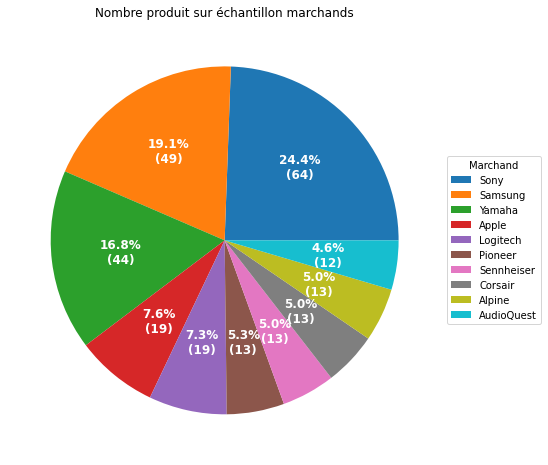

In [4]:
fig, ax = plt.subplots(figsize=(27, 8), subplot_kw=dict(aspect="equal"))

contenu = ["64 Sony", 
           " 50 Samsung", 
           "44 Yamaha", 
           " 20 Apple", 
           " 19 Logitech", 
           "14 Pioneer", 
           " 13 Sennheiser", 
           "13 Corsair", 
           "13 Alpine", 
           "12 AudioQuest"]

data = [float(x.split()[0]) for x in contenu]
legende = [x.split()[-1] for x in contenu]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, legende,
          title="Marchand",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Nombre produit sur échantillon marchands")

plt.savefig('IMGS/Analyse/query_01.jpg', bbox_inches = 'tight', transparent=True)

plt.show()

## Requête 2 :

In [5]:
query_02 = pd.read_sql_query('''
SELECT AVG(r.reviews_rating) as rating, pd.name
FROM product_data pd
left join reviews r on pd.id = r.id
group by pd.name
HAVING COUNT(r.reviews_rating) > 30
ORDER BY avg(r.reviews_rating) DESC
LIMIT 20''', engine)

print(query_02.head(20))
query_02 = query_02.head(20)

query_02.to_csv('BDD/Query_csv/query_02.csv')

      rating                                               name
0   4.852273  Logitech G403 Wireless Gaming Mouse with High ...
1   4.851852  AW6500 All-Weather Outdoor Speaker (White, Sin...
2   4.830000   Sony Mini Digital Video Cassettes - DVC - 1 Hour
3   4.798246  Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chan...
4   4.796296     2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD
5   4.766355      Bowers & Wilkins P7 Wired Over Ear Headphones
6   4.762887  JBL - 6" x 8" 2-Way Coaxial Car Speakers with ...
7   4.659091                Midland Weather Alert Radio, 1.0 CT
8   4.637317  Sony SRSXB30/BLK XB30 Portable Wireless Speake...
9   4.625954                      Flipside 300 Backpack (Black)
10  4.614458  NS-SP1800BL 5.1-Channel Home Theater System (B...
11  4.606061  Microsoft Surface Pro 4 Type Cover with Finger...
12  4.604478  JVC KD-X320BTS Apple iPod and Android Digital ...
13  4.570470       Nighthawk AC1900 Dual-Band Wi-Fi USB Adapter
14  4.550000  Samsung Universal 3100mAh 

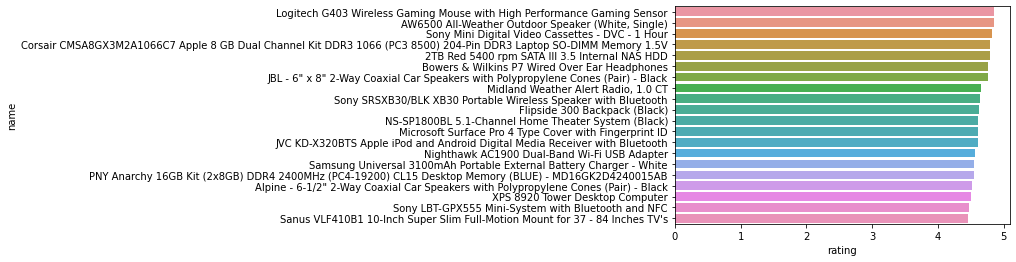

In [12]:
query_02 = pd.read_csv('BDD/Query_csv/query_02.csv')

import seaborn as sns

sns2 = sns.barplot(x="rating", y="name", data=query_02)
fig = sns2.get_figure()
fig.savefig("IMGS/Analyse/query_02.png", bbox_inches= 'tight')

## Requête 3 :

In [7]:
query_03 =pd.read_sql_query('''
select prices_currency, count(prices_id)
from prices p
group by p.prices_currency, p.prices_condition''', engine)

query_03.head(20)

,prices_currency,count
0,None,50
1,USD,2
2,USD,3
3,USD,2
4,USD,15
5,USD,91
6,USD,55
7,CAD,1
8,USD,699
9,USD,143


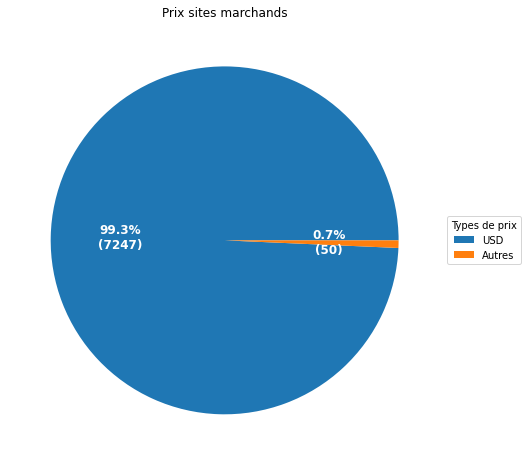

In [8]:
fig, ax = plt.subplots(figsize=(27, 8), subplot_kw=dict(aspect="equal"))

contenu = ["7248 USD",
           "51 Autres"]

data = [float(x.split()[0]) for x in contenu]
legende = [x.split()[-1] for x in contenu]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, legende,
          title="Types de prix",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Prix sites marchands")

plt.savefig('IMGS/Analyse/query_03.jpg', bbox_inches = 'tight', transparent=True)

plt.show()

## Requête 4 :

In [9]:
query_04 =pd.read_sql_query('''
select p.prices_merchant AS Merchant, AVG(p.prices_amountmax) as max, AVG(p.prices_amountmin) as min
from prices p
group by p.prices_merchant
''', engine)
print(query_04.head(20))
query_04 = query_04.head(20)

query_04.to_csv('BDD/Query_csv/query_04.csv')

                    merchant          max          min
0                  Maxi-Aids   449.950012   449.950012
1    Hisense USA Corporation   496.656657   484.989990
2         frankmarks506frank   101.989998   101.989998
3                       None          NaN          NaN
4            digital-solomon   359.989990   359.989990
5        sando_distributions    58.450001    58.450001
6                   Walts TV  1641.418563   989.718568
7   advance_performance_shop    78.000000    78.000000
8            Echo and Optics  3011.719971  3011.719971
9           SaveCentral, LLC   180.614287   152.745710
10           Beach Audio Inc   129.834873   127.465898
11             give5tocancer   261.000000   261.000000
12   WeaKnees DVR Superstore   159.990005   159.990005
13                      6ave   761.243342   761.243342
14  pro_car_audio_consulting   365.000000   365.000000
15     Accessories Wholesale   149.990005   149.990005
16                   n.n3288    54.563333    54.563333
17        

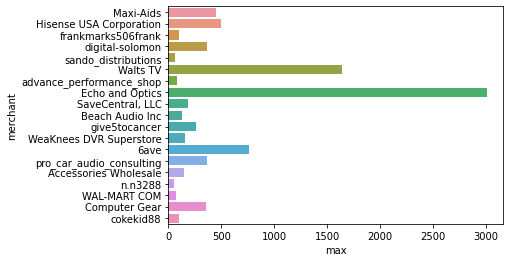

In [10]:
query_04 = pd.read_csv('BDD/Query_csv/query_04.csv')

import seaborn as sns

sns4 = sns.barplot(x="max", y="merchant", data=query_04)
fig = sns4.get_figure()
fig.savefig("IMGS/Analyse/query_04.png", bbox_inches= 'tight', dpi=(150))

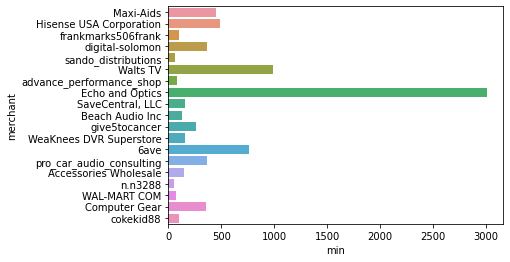

In [11]:
query_04b = pd.read_csv('BDD/Query_csv/query_04.csv')
sns4 = sns.barplot(x="min", y="merchant", data=query_04b)
fig = sns4.get_figure()
fig.savefig("IMGS/Analyse/query_04b.png", bbox_inches= 'tight', dpi=(150))